In [1]:
import os
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

from   astropy.table import Table

In [2]:
fpath = os.environ['CSCRATCH'] + '/desi/BGS/Sam/randoms_N8.fits'

In [3]:
print(fpath)

/global/cscratch1/sd/mjwilson/desi/BGS/Sam/randoms_N8.fits


In [4]:
rand = Table(fitsio.read(fpath))

In [5]:
len(rand)

1000000

In [6]:
rand

RANDOM_RA,RANDOM_DEC,Z,V,RANDID,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,IS_BOUNDARY,N8
float64,float64,float64,float64,int64,str2,float64,float64,float64,int64,int64
136.2649481146463,0.04209164613593508,0.5801282168600688,15061892803.775047,0,G9,1531.6368430502234,34.12536380823712,0.8916857213725904,0,130
129.00262505211532,0.037788391347797656,0.4898384468726457,9668241503.227621,1,G9,1314.3521862060436,-137.81847552388362,0.6709844391185322,1,63
137.5481906690061,-0.014372175816167676,0.3647504326468195,4354058069.315072,2,G9,1011.9715868989713,45.23836005516056,-0.4085675684126484,0,73
129.99560606255457,-0.027251276069922836,0.5459854889026629,12866065407.60941,3,G9,1448.1087239718436,-126.51444359714036,-0.9124217075856016,0,134
135.43716773167557,0.033457821778012375,0.5804041608666513,15080414439.71602,4,G9,1532.5978250112144,11.999177244143082,0.6610480158923456,0,155
134.09107795397873,0.014105859968833734,0.557594540845702,13591331185.02857,5,G9,1480.2594452573476,-23.189497328921103,0.13852564446878185,0,117
138.3721751236605,0.048076475651406936,0.5309324533545178,11958384900.16899,6,G9,1416.1311298061946,83.72652739088481,0.9741796503844398,0,121
132.35398085108855,-0.032266774732110814,0.3624538939290435,4279028546.6642046,7,G9,1006.0651586502897,-46.29414505812172,-0.7207444614847218,0,90
135.11401674016977,0.023609722658302745,0.5788752130956496,14977945554.587393,8,G9,1529.1619726541335,3.3474902688848256,0.396705113316439,0,152


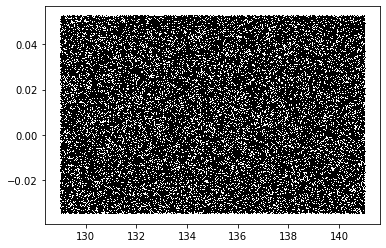

In [7]:
pl.plot(rand['RANDOM_RA'][::10], rand['RANDOM_DEC'][::10], marker=',', lw=0.0, c='k')

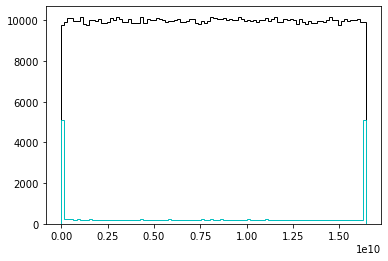

In [8]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(rand['V'][rand['IS_BOUNDARY'].astype(bool)], bins=100, histtype='step', color='c')

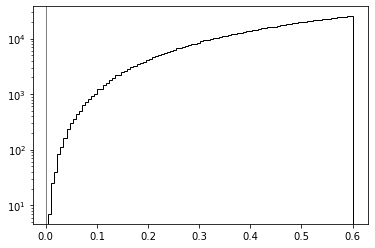

In [9]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')
pl.axvline(300. / 2.9979e5, lw=0.5, c='k')
pl.yscale('log')

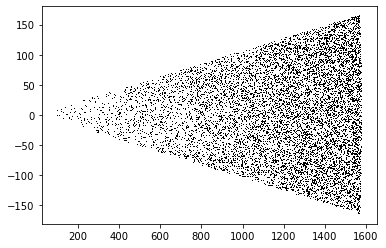

In [10]:
pl.plot(rand['CARTESIAN_X'][::100], rand['CARTESIAN_Y'][::100], marker=',', lw=0.0, c='k')

Text(0, 0.5, 'y')

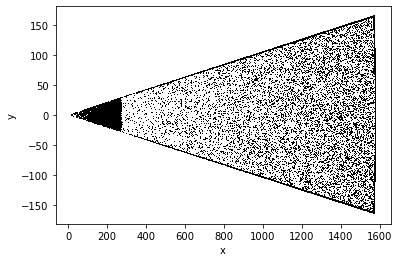

In [11]:
pl.plot(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)], rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='k')
pl.xlabel('x')
pl.ylabel('y')

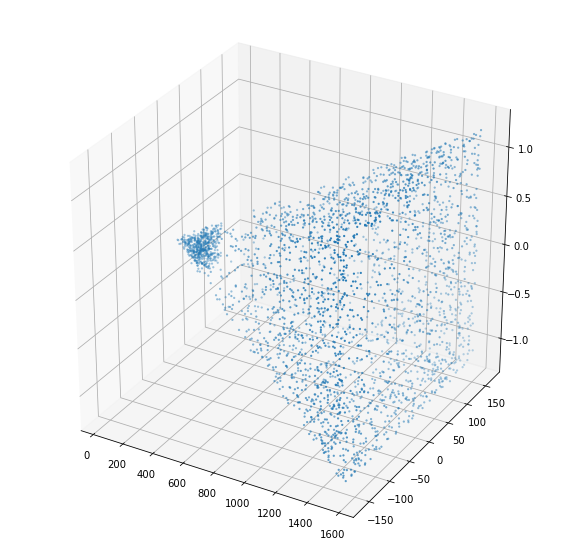

In [12]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Z'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           marker='.',\
           lw=0.0)

In [13]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.01

In [14]:
np.mean(rand['IS_BOUNDARY'].data)

0.02965

In [15]:
rand['N8'].data.min(), rand['N8'].data.max()

(1, 194)

Text(0.5, 0, 'N8')

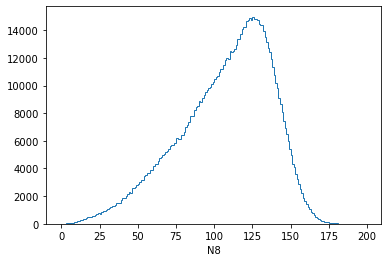

In [19]:
_ = pl.hist(rand['N8'], bins=np.arange(0, 200, 1), histtype='step')
pl.xlabel('N8')

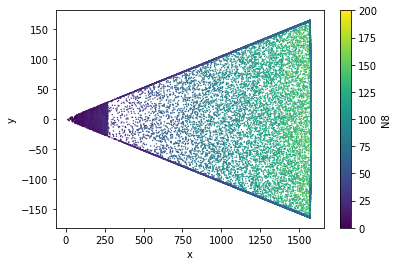

In [23]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['N8'][isin], vmin=0, vmax=200, s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='N8')

# Done.